In [35]:
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
import pymysql.cursors
from sklearn.preprocessing import MinMaxScaler


# 2008년 7월 ~ 2020년 10월의 월별 구글 트렌드 '경제'키워드 검색 비율
## db에 저장

In [11]:
googletrends_df = pd.read_csv('./data/googletrend-month.csv', header=1, sep=',', skip_blank_lines = True)
googletrends_df = googletrends_df.rename({'월': 'date', '경제: (대한민국)':'ratio'}, axis = 'columns')

In [12]:
conn = pymysql.connect(host = "127.0.0.1", user = 'root', passwd = 'yshs0310', db = 'CLI')
cur = conn.cursor()

cur.execute("show databases")
print(cur.fetchall())
cur.execute("use CLI")

(('information_schema',), ('CLI',), ('MusicBank',), ('mysql',), ('mytestdb',), ('performance_schema',), ('sys',))


0

In [13]:
"""
검색어 트랜드 정보 저장할 table 생성
"""

create_table_query = """
CREATE TABLE IF NOT EXISTS google_counting_month(
    id BIGINT(7) NOT NULL AUTO_INCREMENT,
    year bigint(4) NOT NULL,
    month bigint(2) NOT NULL,
    cnt double,
    primary key(id) )
    charset=utf8mb4;
"""
cur.execute(create_table_query)

0

In [14]:
"""
날짜에서 year, month 추출
"""
def extract_year_and_month(period):
    year = period.split('-')[0]
    month = period.split('-')[1]
    return year, month


In [15]:
"""
db table에 저장
"""
for i in range(len(googletrends_df)):
    query = """ 
    Insert into google_counting_month (year, month, cnt) values (%d, %d, %f) ;
    """
    year, month = extract_year_and_month(googletrends_df.iloc[i].date)
    google_cnt = googletrends_df.iloc[i].ratio

    mystring = (query % (int(year), int(month), float(google_cnt)))
    print(mystring)
    cur.execute(mystring)

 
    Insert into google_counting_month (year, month, cnt) values (2008, 7, 79.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 8, 66.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 9, 90.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 10, 99.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 11, 100.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 12, 84.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 1, 68.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 2, 72.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 3, 60.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 4, 83.000000) ;
    
 
    Insert into google_counting_month (year, month, cn

In [16]:
# 확인
query = """ 
select * from google_counting_month ;
"""
cur.execute(query)
tmp=pd.DataFrame(list(cur.fetchall()))
tmp

,0,1,2,3
0,1,2008,7,79.0
1,2,2008,8,66.0
2,3,2008,9,90.0
3,4,2008,10,99.0
4,5,2008,11,100.0
...,...,...,...,...
143,144,2020,6,46.0
144,145,2020,7,41.0
145,146,2020,8,39.0
146,147,2020,9,41.0


In [17]:
commit()
conn.close()
cur.close()


# google trends '경제' 키워드 검색비율 - CCI(경기동행지수) 비교

In [27]:
conn= pymysql.connect(host = "127.0.0.1", user = 'root', passwd = 'yshs0310', db = 'CLI', charset='utf8', cursorclass = pymysql.cursors.DictCursor)

cur = conn.cursor()
sql1 = "select * from google_counting_month"
cur.execute(sql1)
result1 = cur.fetchall()


print(result1)

[{'id': 1, 'year': 2008, 'month': 7, 'cnt': 79.0}, {'id': 2, 'year': 2008, 'month': 8, 'cnt': 66.0}, {'id': 3, 'year': 2008, 'month': 9, 'cnt': 90.0}, {'id': 4, 'year': 2008, 'month': 10, 'cnt': 99.0}, {'id': 5, 'year': 2008, 'month': 11, 'cnt': 100.0}, {'id': 6, 'year': 2008, 'month': 12, 'cnt': 84.0}, {'id': 7, 'year': 2009, 'month': 1, 'cnt': 68.0}, {'id': 8, 'year': 2009, 'month': 2, 'cnt': 72.0}, {'id': 9, 'year': 2009, 'month': 3, 'cnt': 60.0}, {'id': 10, 'year': 2009, 'month': 4, 'cnt': 83.0}, {'id': 11, 'year': 2009, 'month': 5, 'cnt': 72.0}, {'id': 12, 'year': 2009, 'month': 6, 'cnt': 69.0}, {'id': 13, 'year': 2009, 'month': 7, 'cnt': 59.0}, {'id': 14, 'year': 2009, 'month': 8, 'cnt': 57.0}, {'id': 15, 'year': 2009, 'month': 9, 'cnt': 62.0}, {'id': 16, 'year': 2009, 'month': 10, 'cnt': 70.0}, {'id': 17, 'year': 2009, 'month': 11, 'cnt': 67.0}, {'id': 18, 'year': 2009, 'month': 12, 'cnt': 65.0}, {'id': 19, 'year': 2010, 'month': 1, 'cnt': 55.0}, {'id': 20, 'year': 2010, 'month'

In [28]:
sql2 = "select * from coincident_composite_index"
cur.execute(sql2)
result2 = cur.fetchall()

conn.close()
cur.close()

print(result2)

[{'id': 1, 'year': 2008, 'month': 7, 'cci': 100.9}, {'id': 2, 'year': 2008, 'month': 8, 'cci': 100.8}, {'id': 3, 'year': 2008, 'month': 9, 'cci': 100.8}, {'id': 4, 'year': 2008, 'month': 10, 'cci': 100.5}, {'id': 5, 'year': 2008, 'month': 11, 'cci': 99.7}, {'id': 6, 'year': 2008, 'month': 12, 'cci': 98.5}, {'id': 7, 'year': 2009, 'month': 1, 'cci': 97.8}, {'id': 8, 'year': 2009, 'month': 2, 'cci': 97.7}, {'id': 9, 'year': 2009, 'month': 3, 'cci': 97.7}, {'id': 10, 'year': 2009, 'month': 4, 'cci': 97.9}, {'id': 11, 'year': 2009, 'month': 5, 'cci': 97.9}, {'id': 12, 'year': 2009, 'month': 6, 'cci': 98.5}, {'id': 13, 'year': 2009, 'month': 7, 'cci': 98.7}, {'id': 14, 'year': 2009, 'month': 8, 'cci': 98.8}, {'id': 15, 'year': 2009, 'month': 9, 'cci': 98.8}, {'id': 16, 'year': 2009, 'month': 10, 'cci': 99.1}, {'id': 17, 'year': 2009, 'month': 11, 'cci': 99.3}, {'id': 18, 'year': 2009, 'month': 12, 'cci': 99.2}, {'id': 19, 'year': 2010, 'month': 1, 'cci': 99.3}, {'id': 20, 'year': 2010, 'mon

In [30]:
cci = pd.DataFrame(result2)
cci = cci.drop('id', axis = 1)
cci

,year,month,cci
0,2008,7,100.9
1,2008,8,100.8
2,2008,9,100.8
3,2008,10,100.5
4,2008,11,99.7
...,...,...,...
141,2020,4,97.6
142,2020,5,96.8
143,2020,6,97.0
144,2020,7,97.2


In [31]:
google_trend = pd.DataFrame(result1)
google_trend = google_trend.drop('id', axis = 1)
google_trend = google_trend.drop([146, 147], 0)
google_trend

,year,month,cnt
0,2008,7,79.0
1,2008,8,66.0
2,2008,9,90.0
3,2008,10,99.0
4,2008,11,100.0
...,...,...,...
141,2020,4,45.0
142,2020,5,43.0
143,2020,6,46.0
144,2020,7,41.0


In [33]:
google_cci = pd.merge(google_trend, cci)
google_cci

,year,month,cnt,cci
0,2008,7,79.0,100.9
1,2008,8,66.0,100.8
2,2008,9,90.0,100.8
3,2008,10,99.0,100.5
4,2008,11,100.0,99.7
...,...,...,...,...
141,2020,4,45.0,97.6
142,2020,5,43.0,96.8
143,2020,6,46.0,97.0
144,2020,7,41.0,97.2


#### 키워드 검색 비율과 CCI의 scale이 맞지않아, min-max scaler로 조정하여 비교

In [36]:
scaler = MinMaxScaler()
google_cci[['cnt', 'cci']] = scaler.fit_transform( google_cci[['cnt', 'cci']] )
google_cci

,year,month,cnt,cci
0,2008,7,0.720000,0.872340
1,2008,8,0.546667,0.851064
2,2008,9,0.866667,0.851064
3,2008,10,0.986667,0.787234
4,2008,11,1.000000,0.617021
...,...,...,...,...
141,2020,4,0.266667,0.170213
142,2020,5,0.240000,0.000000
143,2020,6,0.280000,0.042553
144,2020,7,0.213333,0.085106


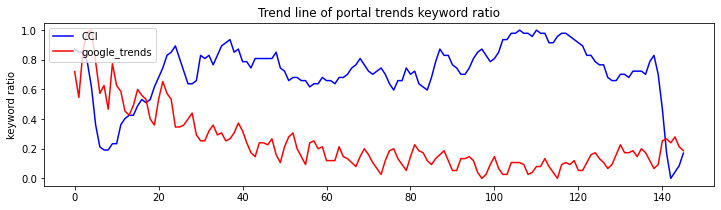

In [43]:
# cci 100이상 호황 / 100미만 불황
plt.figure(figsize = (12,3))
plt.plot(google_cci['cci'], color="blue", label = 'CCI')
plt.plot(google_cci['cnt'], color='red', label = 'google_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

--> CCI와 구글 트렌드에의 '경제'검색 비율의 추세가 반대됨을 확인할 수 있다.

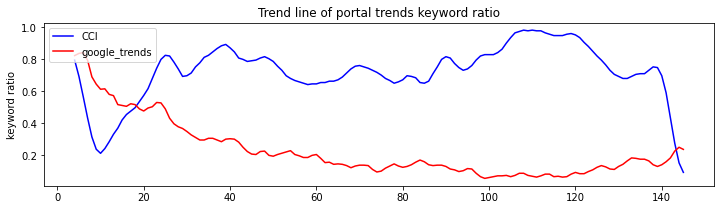

In [46]:
cnt_roll = pd.Series.rolling(google_cci['cnt'], window=5, center = False).mean()
cci_roll = pd.Series.rolling(google_cci['cci'], window=5, center = False).mean()

plt.figure(figsize = (12,3))
cci_roll.plot(color='blue', label='CCI')
cnt_roll.plot(color='red', label='google_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

--> 이동평균으로, CCI와 구글 트렌드에의 '경제'검색 비율의 추세가 반대됨을 더 smooth하게 확인한다.